# Peter Carras's Predator Prey Agent Based Model of Foxes and Rabbits

## Overview

### The Question: 
How can adding and dry and wet season the Lotka Voltera equations effect populations of foxes and rabbits over time?

### The Mathematical Model
dx/dt = α*x - β*x*y
dy/dt = δ*x*y - γ*y

Where the following are positive real parameters

α = growth rate of prey

β = rate at which predators kill prey

δ = growth rate of predators

γ = death rate of predators

### The Solution
An agent based model to show not only the interactions between predator and prey in addition to a modeled food source for rabbits.  The modeled food source supply is directly related to the season. When it is a wet season there food supply grows and when it is dry the food supply decreases.

### My Hypothesis
During the wet season there will be higher populations of rabbits and foxes because there is more food available to the rabbits.

## The Code

### My imports

In [1]:
# standard includes
import numpy as np
import numpy.random as rand
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Next we are going to import some specific libraries we will use to get the animation to work cleanly
from IPython.display import display, clear_output
import time
print('this works')

this works


### The animal class
The animal class is used to represent both the foxes and the rabbits but each has different constants and variables.

In [2]:
class Animal:
    def __init__(self, x,y,t, eat,dist, food,loss):
        #current age in days
        self.age = 0
        #how much food the animal has if this reaches 0 it dies
        self.food = food
        #current x and y position
        self.x = x
        self.y = y
        #type == 1 if rabbit and type == 2 if fox
        self.type = t
        #food lost each turn
        self.loss = loss
        #True if the animal is dead
        self.dead = False
        #How many units of grass can animal consume each turn
        self.eat = eat
        #has the animal moved this day
        self.moved = False
        #has the animal eaten this day
        self.ate = False
        #max travel distance in one day
        self.dist = dist
        #how many days since the animal has breed last
        self.last_breed = 0
print('this works')

this works


### Plotting
I used seaborn to plot a heatmap of the current food on the board and then plotted the foxes and rabbits on top of it.  The rabbits are blue triangles and the foxes are red triangles.

In [3]:
def plotgrid(myarray,foodarray):
    
    # first create two arrays based on the x and y sizes of the grid
    x_range = np.linspace(0, myarray.shape[1]-1, myarray.shape[1]) 
    y_range = np.linspace(0, myarray.shape[0]-1, myarray.shape[0])
    # use the numpy meshgrid function to make two matrices
    
    # the size of myarray with x and y indexes
    x_indices, y_indices = np.meshgrid(x_range, y_range)
    
    # make arrays of all the x and y indexes of rabbits and foxes
    rabbit_x = x_indices[myarray == 1];   
    rabbit_y = y_indices[myarray == 1];
    fox_x = x_indices[myarray == 2];   
    fox_y = y_indices[myarray == 2];
    
    #heatmap of foodarray
    sns.heatmap(foodarray,cmap = 'Greens')
    plt.plot(rabbit_x, myarray.shape[0] - rabbit_y - 1, 'b>',markersize=8)
    plt.plot(fox_x, myarray.shape[0] - fox_y - 1, 'r>',markersize=8)
    # Set the limits of the graph
    plt.xlim([-1,myarray.shape[1]])
    plt.ylim([-1,myarray.shape[0]]) 

    # ticked off
    plt.tick_params(axis='both', which='both',
                    bottom=False, top=False, left=False, right=False,
                    labelbottom=False, labelleft=False)
print('this works')

this works


In [4]:
def set_board(board_size=50,f_rabbit_start=0.1 ,f_fox_start = 0.01,max_food = 10):
    '''
    Creates the initial game board.

    Inputs:
        board_size: length of one edge of the board
        f_trees_start: probability that a given cell is a tree
                       (effectively the tree density)

    Outputs a 2D numpy array with values set to either 0, 1, or 2
       '''
    
    # all cells initialized to 'empty' (0) by default
    game_board = np.zeros((board_size,board_size),dtype='int64')
    food_board = np.zeros((board_size,board_size),dtype='float')
    animals = []

    for i in range(board_size):
        for j in range(board_size):
            #rabbit
            r = rand.random()
            if r <= f_fox_start:
                #add fox
                animals.append(Animal(i,j,2,fox_eat,fox_dist,fox_food,fox_loss))
                game_board[i,j] = 2
            else:
                if r <= f_rabbit_start:
                    #add rabbit
                    animals.append(Animal(i,j,1,rabbit_eat,rabbit_dist,rabbit_food,rabbit_loss))
                    game_board[i,j] = 1
                    
            #food
            food_board[i,j] = np.random.random()*max_food
    

    return game_board,food_board,animals
print('this works')

this works


In [5]:
def get_neighbors(game_board,r,c,dist):
    test_neighbors = []#[(r-d, c), (r, c-d), (r+d, c), (r, c+d)] #potential neighbors
    for d in range(1,dist+1):
        test_neighbors.append((r-d, c))
        test_neighbors.append((r, c-d))
        test_neighbors.append((r+d, c))
        test_neighbors.append((r, c+d))
    neighbors = []
    for n in test_neighbors:
        if n[0] <= game_board.shape[0]-1 and n[0] >= 0 and n[1] <= game_board.shape[1]-1 and n[1] >= 0:
            neighbors.append(n)#add the neighbors that are on the board
    return neighbors
print('this works')

this works


In [6]:
def rabbit_move(a,neighbors,new_game_board,new_food_board):
    #if there is food in current position eat it
    n_shuffle = neighbors
    np.random.shuffle(n_shuffle)
    f_x = new_food_board.shape[0] - a.x - 1
    
    #if there is another location with food move there
    c = 0
    while not a.moved and c < len(n_shuffle):
        n = n_shuffle[c]
        #if there is food and there is not an animal there move there
        f_y = new_food_board.shape[0] - n[0] - 1
        if new_food_board[f_x,n[1]] > a.eat and new_game_board[n[0],n[1]] == 0:
            a.moved = True
            new_game_board[a.x, a.y] = 0
            a.x, a.y = n[0], n[1]
            new_game_board[n[0],n[1]] = a.type
        c += 1
print('this works')

this works


In [7]:
def fox_move(a,neighbors,new_game_board,new_food_board):
    c = 0
    while not a.moved and c < len(neighbors):
        #current neighbor
        n = neighbors[c]
                    
        # Find a rabbit in one if its neighboring locations
        if new_game_board[n[0],n[1]] == 1:
            # Find which rabbit it is
            #current prey index
            p = 0
            while p < len(animals) and a.ate == False:
                #find the rabbit at the neighbor location
                if animals[p].x == n[0] and animals[p].y == n[1]:
                    #gain the food value of the rabbit because the more food a rabbit has eaten, the more nutrition it offers
                    a.food += animals[p].food * fox_gain
                    animals[p].dead = True
                    new_game_board[animals[p].x, animals[p].y] = 0
                    a.moved = True
                    a.ate = True
                    a.x, a.y = n[0], n[1]
                    new_game_board[n[0],n[1]] = a.type
                p += 1
        c += 1

In [8]:
def random_move(a,neighbors,board):
    #move max distance in random direction                c = 0
    n = neighbors[-4:]
    np.random.shuffle(n)
    c = 0
    while c < len(n) and a.moved == False:
        if board[n[c][0], n[c][1]] == 0:
            a.moved = True
            board[a.x, a.y] = 0
            a.x, a.y = n[c][0], n[c][1]
            board[a.x, a.y] = a.type
        c += 1
    #if it can't move max distance move to a random location
    if a.moved == False:
        c = 0
        np.random.shuffle(neighbors)
        n = neighbors
        while c < len(n) and a.moved == False:
            if board[n[c][0], n[c][1]] == 0:
                a.moved = True
                board[a.x, a.y] = 0
                a.x, a.y = n[c][0], n[c][1]
                board[a.x, a.y] = a.type
            c+=1 

In [12]:
def advance_board(game_board,food_board,animals):
    '''
    Advances the game board using the given rules.
    Input: the initial game board.
    Output: the advanced game board
    '''
    new_game_board = np.copy(game_board)
    new_food_board = np.copy(food_board)
    for a in animals:
        #decrement food and increase age
        a.food -= a.loss
        #increase age
        a.age += 1
        a.last_breed += 1
        a.moved = False
        a.ate = False
        if a.food <= 0:
            a.dead = True
            new_game_board[a.x, a.y] = 0
            
        #if it isn't dead find neighbors and eat/move
        if a.dead == False:
            #get neighbors
            neighbors = get_neighbors(new_game_board,a.x,a.y,a.dist)
            
            #if it is a rabbit
            if a.type == 1:
                if a.food > rabbit_threshold and a.last_breed > rabbit_breed:
                    #create new rabbit
                    #reset breed time
                    r = np.random.random()
                    if r > breed_chance:
                        a.last_breed = 0
                        animals.append(Animal(a.x,a.y,1,rabbit_eat,rabbit_dist,rabbit_food,rabbit_loss))
                #because of the way the board is plotted the x axis needs to be flipped for the food board
                f_x = new_food_board.shape[0] - a.x - 1
                #if there is food in the rabbits current location and the rabbit is not full eat it
                if new_food_board[f_x,a.y] >= a.eat and a.food < rabbit_max_food:
                    new_food_board[f_x,a.y] -= a.eat 
                    a.food += a.eat * rabbit_gain
                    a.ate = True
                #if the rabbit is hungry and there is not food in current location move
                elif a.food < rabbit_max_food:
                    rabbit_move(a,neighbors,new_game_board,new_food_board)
                    #if an animal didn't find a place with food but is still hungry move to a random location 
                    if a.moved == False and len(neighbors) >0:
                        random_move(a,neighbors,new_game_board)
                
            #if it is a fox
            if a.type == 2:
                if a.food > fox_threshold and a.last_breed > fox_breed:
                    r = np.random.random()
                    if r > breed_chance:
                        #create new fox
                        #resent breed time
                        a.last_breed = 0
                        animals.append(Animal(a.x,a.y,2,fox_eat,fox_dist,fox_food,fox_loss))
                #if the fox is hungry attemp to find and kill food
                if a.food < fox_max_food:   
                    fox_move(a,neighbors,new_game_board,new_food_board)
                #if it is not hungry or didn't find food move randomly
                if a.moved == False:
                    random_move(a,neighbors,new_game_board)
            
        
            
        
        #Error check the game_board
        new_game_board *= 0
        for a in animals:
            if a.type == 1:
                if a.age > rabbit_max_age:
                    d = np.random.random()
                    if d <= death_chance:
                        a.dead = True
            elif a.type == 2:
                if a.age > fox_max_age:
                    d = np.random.random()
                    if d <= death_chance:
                        a.dead = True
            if a.dead:
                new_game_board[a.x, a.y] = 0
                animals.remove(a)
            else:
                new_game_board[a.x, a.y] = a.type
                
    # update grass growth
    if rain == True:
        #grass grows each day in rainy season
        new_food_board[new_food_board < max_growth - rain_growth] += rain_growth
    else:
        #grass shrinks in rainy season
        new_food_board[new_food_board < max_growth - dry_growth] += dry_growth

    return new_game_board,new_food_board,animals
print('this works')

this works


### Constants

In [13]:
#constants
#how much grass it eats at time
rabbit_eat = 2
#number of tiles it can move in one day
rabbit_dist = 4
#starting food
rabbit_food = 10
#how much grass it can eat at a time
fox_eat = 0
#how many tiles it can travel in a day
fox_dist = 10
#how much food it starts out with
fox_food = 25
#percentage chance that a rabbit or fox will breed once it has enough food
breed_chance = .5
#amount of food it needs to breed
fox_threshold = 20
rabbit_threshold = 15
#How many days between breeding
fox_breed = 30
rabbit_breed = 5
#How much food an animal can eat before it will stop eating
rabbit_max_food = 20
fox_max_food = 30
#percentage of food that is consumed is turned to its energy
fox_gain = .6
rabbit_gain = .8
#Max age before there is a change the animal will die
fox_max_age = 100
rabbit_max_age = 50
# % chance after max age the animal will die
death_chance = .3
#Amount of food lost each turn
fox_loss = 1.5
rabbit_loss = 1
#Max amount of food one block of grass can hold
max_growth = 10
#counter to keep track of total days
days = 1
#if it is dry season grass dies
dry_growth = -.2
#if True the first season is rainy season and grass grows
start_rain = True
#amount grass grows in rainy season
rain_growth = .4
#number of days of rain before season changes to dry
rain_length = 30
#number of days of drought before season changes to rainy
dry_length = 15
#Setup Constants
board_size=40
f_rabbit_start=0.02
f_fox_start = 0.0025
max_food = 10

### Animation

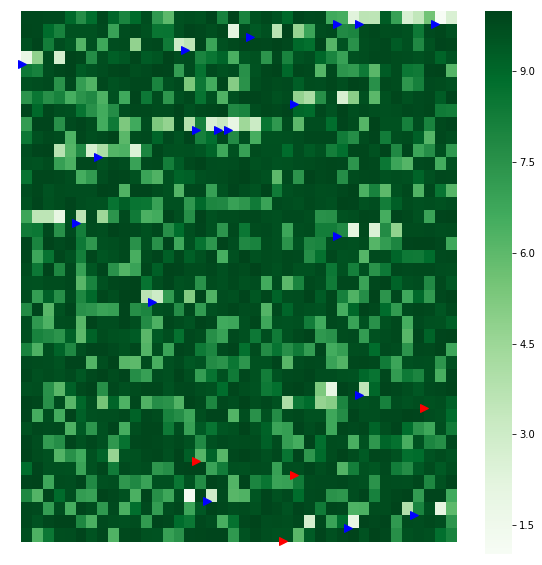

KeyboardInterrupt: 

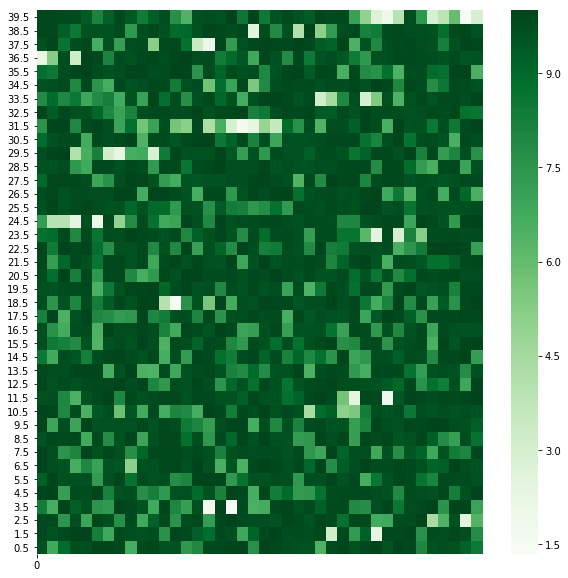

In [14]:
fig = plt.figure(figsize=(10,10))
board,food,animals = set_board(board_size,f_rabbit_start ,f_fox_start ,max_food)
plotgrid(board,food)
print('this works')
rain = start_rain
while len(animals)>0:
    
    board,food,animals = advance_board(board,food,animals)
    #increment number of days and update seasons
    days += 1
    if rain == True:
        #grass grows each day in rainy season
        if days % rain_length == 0:
            rain = False
    else:
        if days % dry_length == 0:
            rain = True
    # plots the board
    
    plotgrid(board,food)
    time.sleep(0.01)  # 
    clear_output(wait=True)
    display(fig)
    fig.clear()



In [364]:
rabbit_populations = []
fox_populations = []
season_trackers = []
day_trackers = []
loops = 10
for i in range(0,loops):
    days = 0
    rain = start_rain
    rabbit_population = []
    fox_population = []
    season_tracker = []
    day_tracker = []
    board,food,animals = set_board(board_size,f_rabbit_start ,f_fox_start ,max_food)
    while len(animals)>0:
        #increment number of days
        days += 1
        board,food,animals = advance_board(board,food,animals)
        r_count = 0
        f_count = 0
        #count the populations each day for foxes and rabbits
        for a in animals:
            if a.type == 1:
                r_count +=1
            if a.type ==2:
                f_count +=1
        if rain == True:
            season_tracker.append(1)
        else:
            season_tracker.append(0)
            day_tracker.append(days)
        rabbit_population.append(r_count)
        fox_population.append(f_count)
        #update seasons
        if rain == True:
            #grass grows each day in rainy season
            if days % rain_length == 0:
                rain = False
        else:
            if days % dry_length == 0:
                rain = True
    rabbit_populations.append(rabbit_population)
    fox_populations.append(fox_population)
    season_trackers.append(season_tracker)
    day_trackers.append(day_tracker)

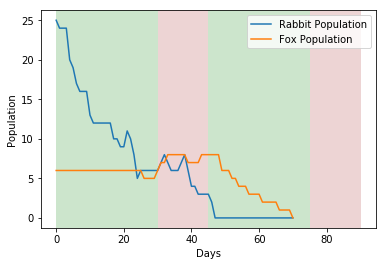

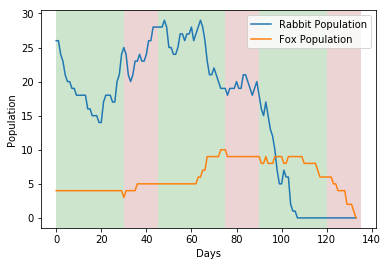

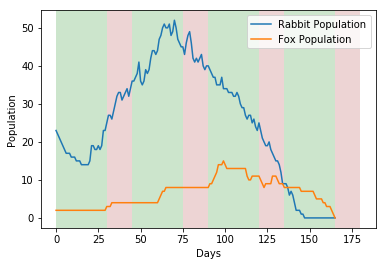

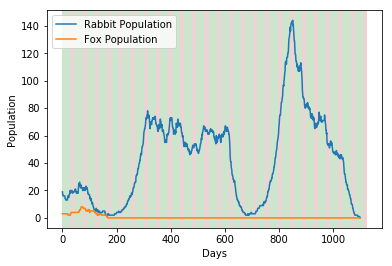

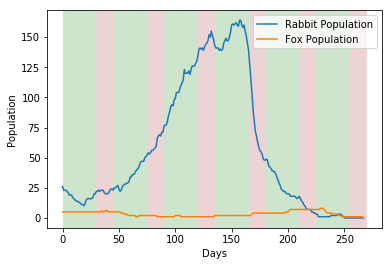

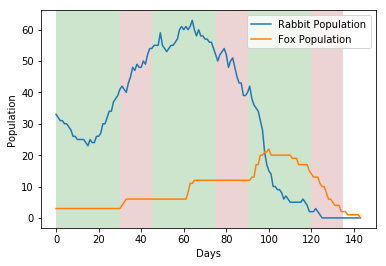

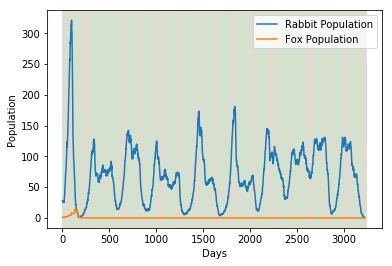

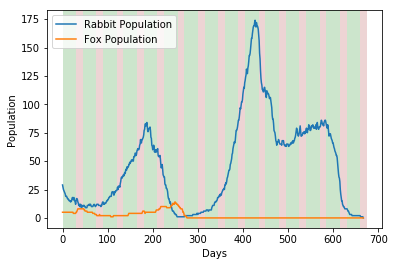

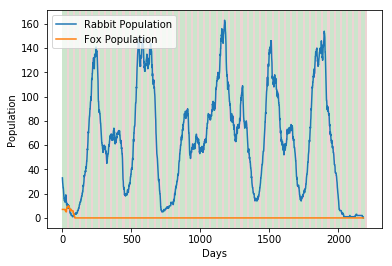

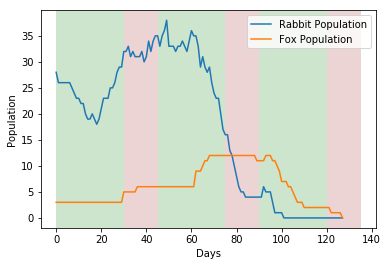

In [393]:
for i in range(0,loops):
    fig, ax = plt.subplots()
    ax.plot(rabbit_populations[i],label = 'Rabbit Population')
    ax.plot(fox_populations[i], label = 'Fox Population')
    year = dry_length + rain_length
    num_years = np.ceil(day_trackers[i][-1]/(year))
    ax.legend()
    if start_rain == True:
        ax.axvspan(0, rain_length, facecolor='green', alpha=0.2)
        ax.axvspan(rain_length, year, facecolor='brown', alpha=0.2)
        ax.set_xlabel('Days')
        ax.set_ylabel('Population')
        for y in range(1,int(num_years)):
            ax.axvspan(year*y , rain_length + year*y, facecolor='green', alpha=0.2)
            ax.axvspan(rain_length + year*y, year + year*y, facecolor='brown', alpha=0.2)

## Conclusion
From these ten different simulations we can see the in the short run and the long run there appears to be little to no correlation between season and population.  You can see from the first graph that if the number of starting foxes is too high they will hunt down the rabbits and it won't matter that it is a rainy season with more food. The populations seem to be more dependent on themselves. If the there are too many rabbits there will not be enough food and they will start to starve and not have enough food to breed.  For the Foxes you can see from the last graph that if their population is able to increase when there is a large population of rabbits but  if their population grows too large they will kill of all the rabbits and they will all die.

## Improvements
If I were to continue working on the model I would improve the fox behevior to simulate how they burn less calories when they don't need to hunt. I believe this would allow both populations to survive if the foxes over hunted the rabbits. I would also need to work on the hunting behavior and implement a hunting success rate that decreases as the number of rabbits decreases.  I would also decrease the travel distance of the foxes per day but have them travel towards a rabbit in a larger hunt distance instead of a random move. I would also like to implement a function to make a more realistic environment.  There should be some areas that from the start have no grass and maybe offer protection for the rabbits from foxes.